In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
detector = cv2.FaceDetectorYN.create(
    "models/face_detection_yunet_2022mar.onnx", "", (320, 320), 0.8, 0.3, 10
)

In [7]:
def visualize(input, faces, thickness=5):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            coords = face[:-1].astype(np.int32)
            cv2.rectangle(input, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
            cv2.circle(input, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
            cv2.circle(input, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
            cv2.circle(input, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
            cv2.circle(input, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
            cv2.circle(input, (coords[12], coords[13]), 2, (0, 255, 255), thickness)


In [8]:
main_img = cv2.imread('media/images/The Shawshank Redemption.jpg')
cp_img = main_img.copy()
shape = main_img.shape

In [9]:
shape

(1080, 1920, 3)

In [ ]:
detector.setInputSize((shape[1], shape[0]))
main_Faces = detector.detect(cp_img)

In [6]:
main_Faces

(1,
 array([[8.1896643e+02, 2.6990161e+02, 2.8257199e+02, 3.5869489e+02,
         8.2892633e+02, 3.6962543e+02, 9.6600171e+02, 3.7304013e+02,
         8.5528735e+02, 4.5759161e+02, 8.4064874e+02, 5.2985028e+02,
         9.5628839e+02, 5.3305737e+02, 9.9758923e-01],
        [4.6608606e+02, 1.5652859e+02, 2.7049741e+02, 3.8315973e+02,
         5.2961865e+02, 2.7621198e+02, 6.8586285e+02, 3.1274496e+02,
         5.7828925e+02, 3.9358008e+02, 5.0633722e+02, 4.5684326e+02,
         6.3203375e+02, 4.8635062e+02, 9.1235620e-01]], dtype=float32))

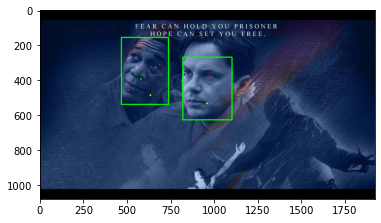

In [7]:
visualize(cp_img, main_Faces)
plt.imshow(cp_img[...,::-1])

In [8]:
def get_alignes(image, faces):
    face_aligns = []
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            align = recognizer.alignCrop(image, face)
            face_aligns.append(align)
            
    return face_aligns

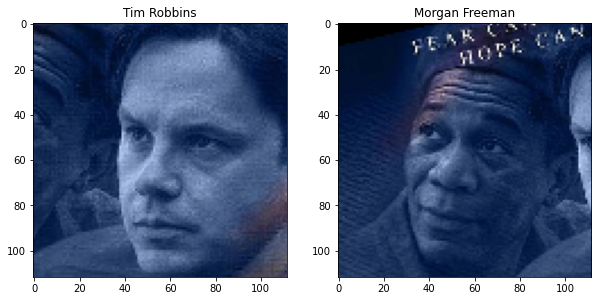

In [9]:
recognizer = cv2.FaceRecognizerSF.create(
"models/face_recognition_sface_2021dec.onnx","")

names = ["Tim Robbins", "Morgan Freeman"]

face_aligns = get_alignes(main_img, main_Faces)

plt.figure(figsize=[10,8])
for i, align in enumerate(face_aligns):
    plt.subplot(1,2,i+1);plt.imshow(align[...,::-1]);plt.title(names[i]);


In [10]:
Robbins_feature = recognizer.feature(face_aligns[0])
Morgan_feature = recognizer.feature(face_aligns[1])

In [11]:
Robbins_feature.shape

(1, 128)

In [12]:
l2_similarity_threshold = 1.128

def match(frame):
    shape = frame.shape
    cp_frame = frame.copy()
    
    
    detector.setInputSize((shape[1], shape[0]))
    faces = detector.detect(frame)
    aligns = get_alignes(cp_frame, faces)
    if faces[1] is not None:
        for face in faces[1]:
            align = recognizer.alignCrop(frame, face)
            test_feature = recognizer.feature(align)
            l2_score = recognizer.match(Robbins_feature, test_feature, cv2.FaceRecognizerSF_FR_NORM_L2)
            coords = face[:-1].astype(np.int32)

            if l2_score <= l2_similarity_threshold:
                cv2.rectangle(cp_frame, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), 3)
            else:
                cv2.rectangle(cp_frame, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 0, 255), 3)
    
    cp_frame = cv2.flip(cp_frame,1)
    return cp_frame
    


In [15]:
cap = cv2.VideoCapture('media/videos/The Shawshank_Redemption_input.mp4')
if not cap.isOpened():
        print("Could not open video")
else : 
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        
video_out = cv2.VideoWriter('Tim Robbins_face detection.mp4', cv2.VideoWriter_fourcc(*'avc1'), 30, (width, height))

while True and cap.isOpened():
    ret, frame = cap.read()
    match_frame = match(frame)
    
    match_frame = cv2.flip(match_frame,1)
    video_out.write(match_frame)
    
    cv2.imshow('matched faces', match_frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()      

####      `result video saved in ./Tim Robbins_face detection.mp4`

#### Also you can change input images with your picture and if run this code your face recognized with green box in frames and show in opening window

In [136]:
# webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    match_frame = match(frame)
    
    cv2.imshow('matched faces', match_frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()      